In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [4]:
start = '2010-01-01'
end = '2022-05-15'

df = yf.download('TTM', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,17.570000,18.090000,17.490000,18.030001,16.901852,2141700
2010-01-05,17.780001,17.900000,17.620001,17.850000,16.733114,2022500
2010-01-06,17.900000,18.010000,17.770000,17.990000,16.864353,2057800
2010-01-07,17.389999,17.629999,17.340000,17.570000,16.470634,2706800
2010-01-08,17.559999,17.559999,17.370001,17.400000,16.311270,1967200


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,17.570000,18.090000,17.490000,18.030001,16.901852,2141700
1,2010-01-05,17.780001,17.900000,17.620001,17.850000,16.733114,2022500
2,2010-01-06,17.900000,18.010000,17.770000,17.990000,16.864353,2057800
3,2010-01-07,17.389999,17.629999,17.340000,17.570000,16.470634,2706800
4,2010-01-08,17.559999,17.559999,17.370001,17.400000,16.311270,1967200


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,17.570000,18.090000,17.490000,18.030001,2141700
1,17.780001,17.900000,17.620001,17.850000,2022500
2,17.900000,18.010000,17.770000,17.990000,2057800
3,17.389999,17.629999,17.340000,17.570000,2706800
4,17.559999,17.559999,17.370001,17.400000,1967200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3113 non-null   float64
 1   High    3113 non-null   float64
 2   Low     3113 non-null   float64
 3   Close   3113 non-null   float64
 4   Volume  3113 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 121.7 KB


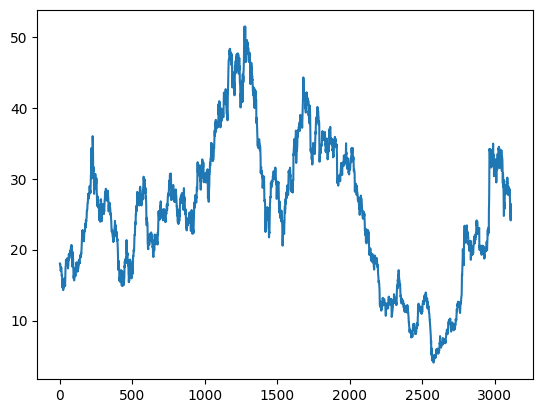

In [8]:
plt.plot(df.Close)

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
3108    30.2612
3109    30.1943
3110    30.1226
3111    30.0607
3112    30.0299
Name: Close, Length: 3113, dtype: float64

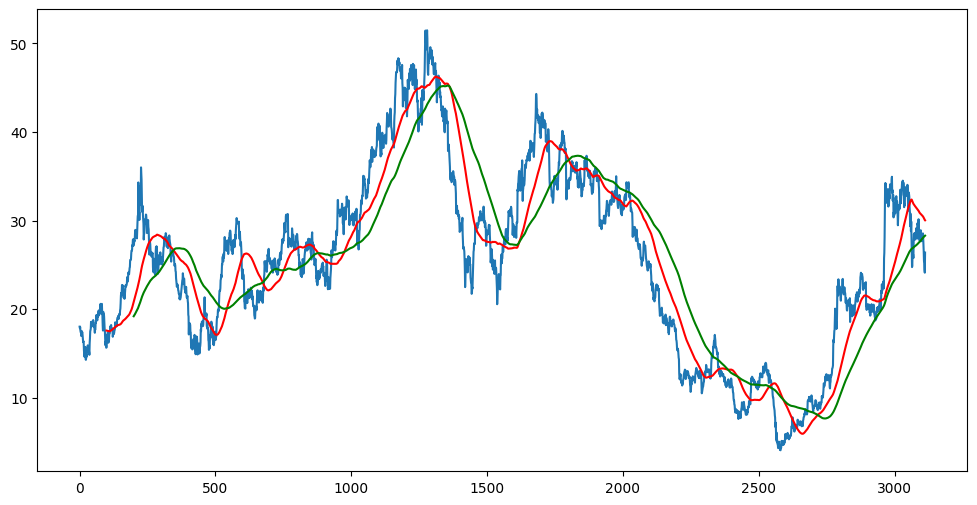

In [12]:
ma200 = df.Close.rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

### Spliting Data into Trianing and Testing

In [13]:
data_training = pd.DataFrame(df['Close'][0: int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2179, 1)
(934, 1)


In [14]:
# convert into the 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(2179, 1)

In [16]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

In [17]:
# convert into the numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train

array([[[0.10083358],
        [0.09599356],
        [0.099758  ],
        ...,
        [0.05700457],
        [0.03683786],
        [0.03764454]],

       [[0.09599356],
        [0.099758  ],
        [0.08846464],
        ...,
        [0.03683786],
        [0.03764454],
        [0.07448237]],

       [[0.099758  ],
        [0.08846464],
        [0.08389351],
        ...,
        [0.03764454],
        [0.07448237],
        [0.06453349]],

       ...,

       [[0.35278299],
        [0.35869859],
        [0.35116967],
        ...,
        [0.13121807],
        [0.12557141],
        [0.10486691]],

       [[0.35869859],
        [0.35116967],
        [0.34848076],
        ...,
        [0.12557141],
        [0.10486691],
        [0.10943803]],

       [[0.35116967],
        [0.34848076],
        [0.34740523],
        ...,
        [0.10486691],
        [0.10943803],
        [0.11804249]]])

# Model 

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=170, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units= 1))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 120)         

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
65/65 [==============================] - 31s 382ms/step - loss: 0.0452
Epoch 2/50
65/65 [==============================] - 23s 361ms/step - loss: 0.0131
Epoch 3/50
65/65 [==============================] - 24s 371ms/step - loss: 0.0105
Epoch 4/50
65/65 [==============================] - 24s 376ms/step - loss: 0.0098
Epoch 5/50
65/65 [==============================] - 25s 382ms/step - loss: 0.0084
Epoch 6/50
65/65 [==============================] - 25s 387ms/step - loss: 0.0079
Epoch 7/50
65/65 [==============================] - 26s 395ms/step - loss: 0.0075
Epoch 8/50
65/65 [==============================] - 25s 387ms/step - loss: 0.0073
Epoch 9/50
65/65 [==============================] - 27s 409ms/step - loss: 0.0066
Epoch 10/50
65/65 [==============================] - 33s 506ms/step - loss: 0.0069
Epoch 11/50
65/65 [==============================] - 31s 481ms/step - loss: 0.0063
Epoch 12/50
65/65 [==============================] - 30s 454ms/step - loss: 0.0064
Epoch 13/50
6

In [24]:
model.save('keras_model.h5')

In [25]:
past_100_days = data_training.tail(100)

In [26]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Bhavik\AppData\Local\Temp\ipykernel_19844\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [27]:
final_df.head()

,Close
0,27.240000
1,27.200001
2,27.190001
3,27.170000
4,26.719999


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.75048609],
       [0.74918995],
       [0.7488659 ],
       ...,
       [0.66040182],
       [0.64938437],
       [0.72294233]])

In [29]:
input_data.shape

(1034, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(934, 100, 1)
(934,)


In [32]:
# Making Predictions
y_predicted = model.predict(x_test)
y_predicted.shape

30/30 [==============================] - 7s 114ms/step


(934, 1)

In [33]:
y_test

array([4.67271571e-01, 4.52689563e-01, 4.68891767e-01, 4.60790665e-01,
       4.64679221e-01, 4.65651375e-01, 4.78289075e-01, 4.76020776e-01,
       4.61762819e-01, 4.61438768e-01, 4.59170469e-01, 4.52365573e-01,
       4.40375915e-01, 4.35191214e-01, 4.45236563e-01, 4.45560615e-01,
       4.23201556e-01, 4.03758960e-01, 4.01490600e-01, 3.91769302e-01,
       3.72650696e-01, 3.65521718e-01, 3.72326645e-01, 3.70706449e-01,
       3.66169821e-01, 3.51587843e-01, 3.38302041e-01, 3.33117309e-01,
       2.81918347e-01, 2.62475720e-01, 2.59235267e-01, 2.68632544e-01,
       2.71872997e-01, 2.77705770e-01, 2.58587195e-01, 2.51458216e-01,
       2.53078443e-01, 2.44005186e-01, 2.52430340e-01, 2.36876239e-01,
       2.45949464e-01, 2.43357114e-01, 2.54050566e-01, 2.59559318e-01,
       2.63447844e-01, 2.77705770e-01, 2.81270274e-01, 2.86779026e-01,
       2.89371377e-01, 2.94880128e-01, 2.90667552e-01, 2.92611799e-01,
       2.60531442e-01, 2.62475720e-01, 2.65068070e-01, 2.75113420e-01,
      

In [34]:
scaler.scale_

array([0.03240441])

In [35]:
scaler_factor = 1 / 0.00682769
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

In [40]:
from sklearn.metrics import r2_score
print('R2 Score: {}'.format(r2_score(y_test, y_predicted)))

R2 Score: 0.9630439383658537


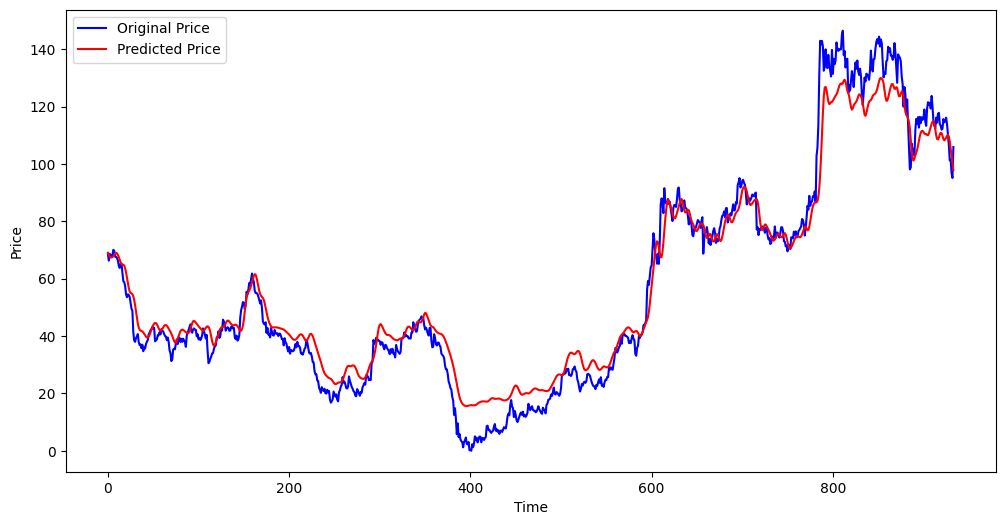

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()